In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(reshape2)
library(plotly)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




In [5]:
smokers <- read.csv('../input/smokers.csv', header = T)
prescriptions <- read.csv('../input/prescriptions.csv', header = T)
metrics <- read.csv('../input/metrics.csv', header = T)

In [6]:
smokers_tall <- melt(smokers[,-2], id.vars = c("Year", "Sex"))
smokers_gender <- aggregate(x = smokers_tall$value, by = list(smokers_tall$Sex), FUN = sum)
names(smokers_gender) <- c("Sex", "N")
smokers_gender$Sex <- factor(smokers_gender$Sex, levels = c("NA", "Female", "Male"))

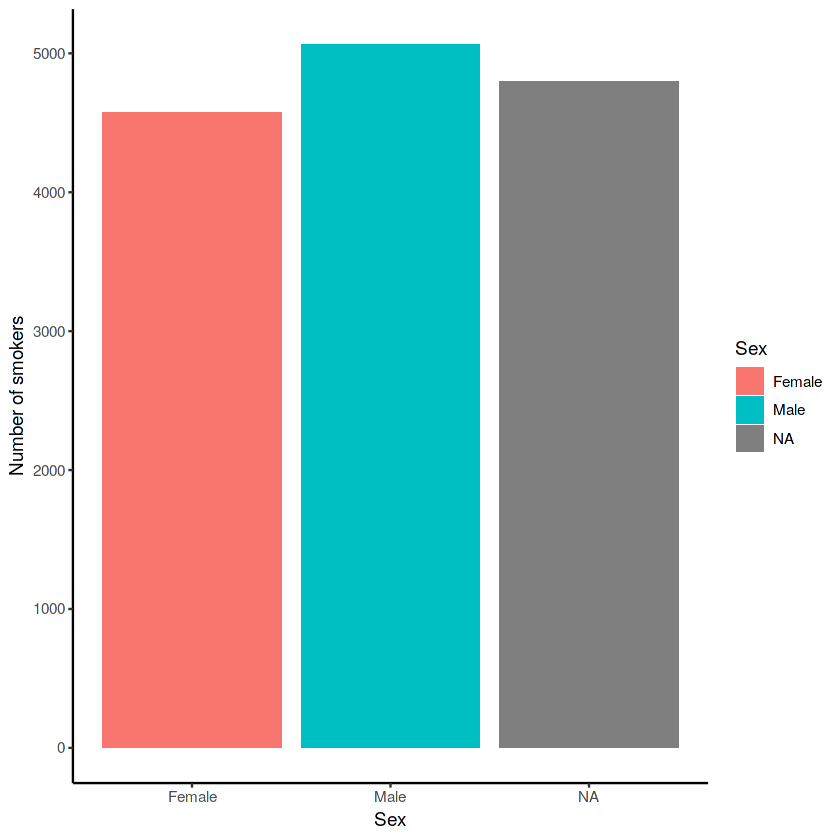

In [7]:
ggplot(smokers_gender, aes(Sex, N, fill=Sex))+
    geom_bar(stat = "identity")+
    theme_classic()+
    ylab("Number of smokers")

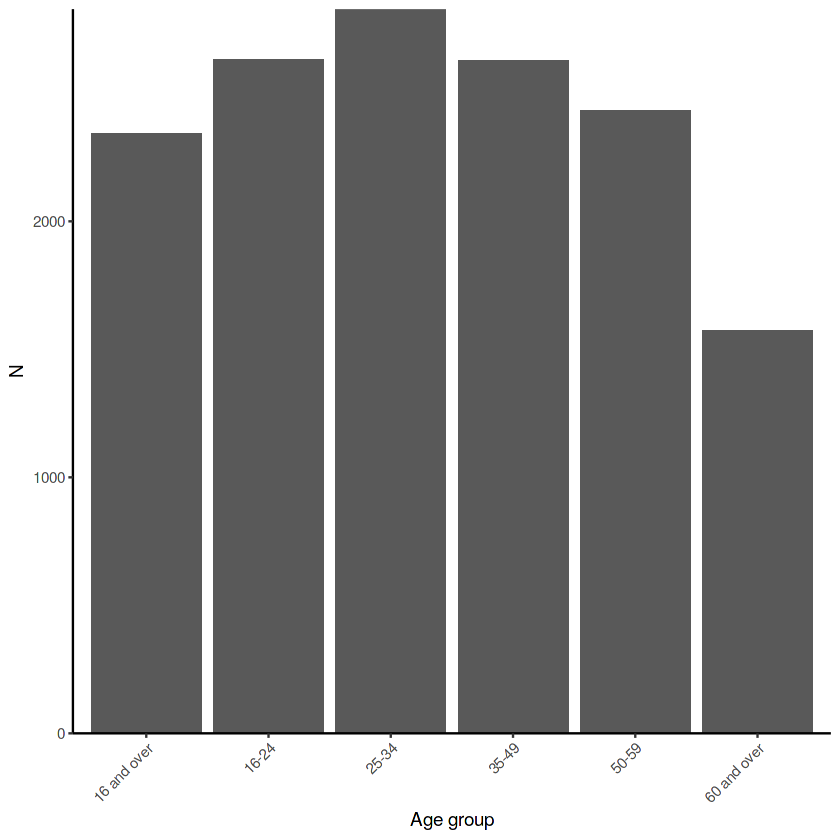

In [8]:
smokers_age <- aggregate(x = smokers_tall$value, by = list(smokers_tall$variable), FUN = sum)
names(smokers_age) <- c("Age", "N")
age_labels <- c("16 and over", "16-24", "25-34", "35-49", "50-59", "60 and over")
ggplot(smokers_age, aes(Age, N))+
    geom_bar(stat = "identity")+
    theme_classic()+
    xlab("Age group")+
    scale_x_discrete(labels = age_labels)+
    theme(axis.text.x = element_text(angle = 45, hjust = 1))+
    scale_y_continuous(expand = c(0,0))

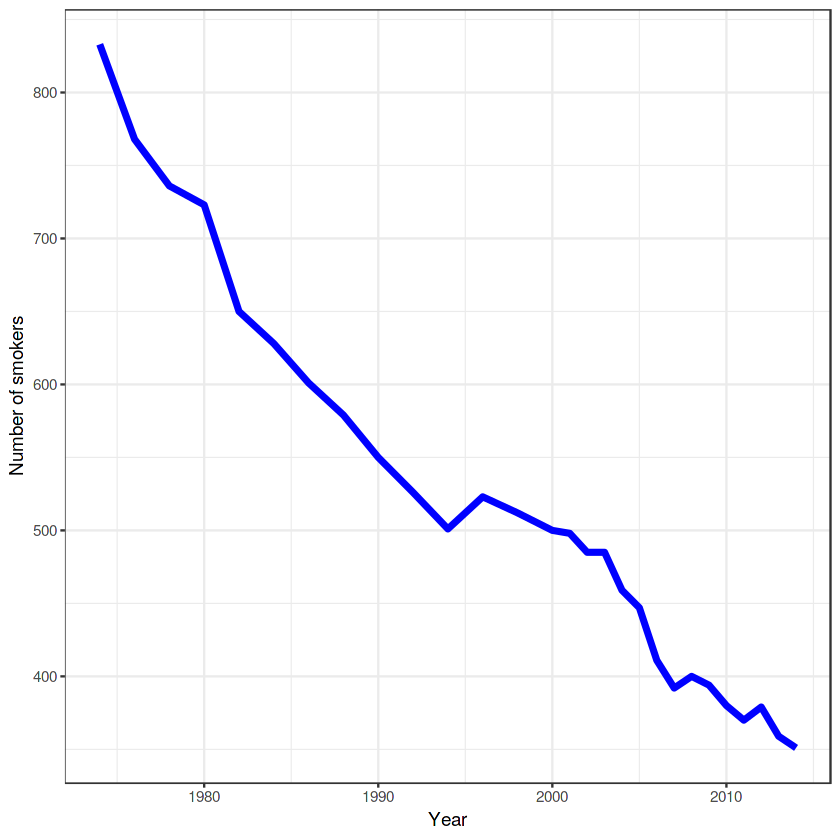

In [9]:
smokers_years <- aggregate(x = smokers_tall$value, by = list(smokers_tall$Year), FUN = sum)
ggplot(smokers_years, aes(Group.1, x))+
    geom_line(color="blue", size = 1.5)+
    theme_bw()+
    xlab("Year")+
    ylab("Number of smokers")

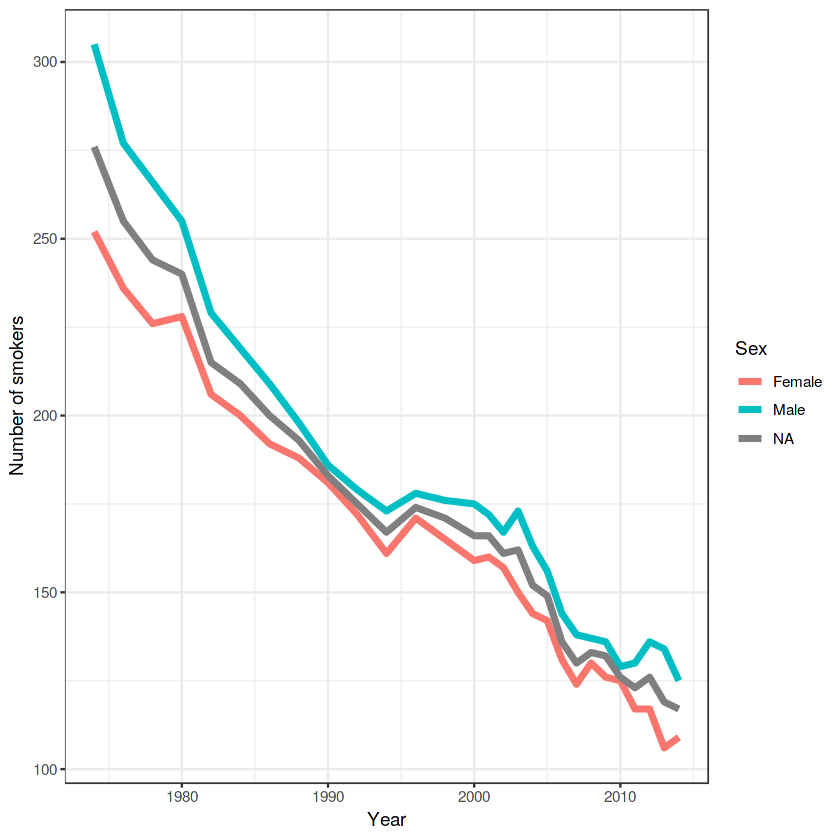

In [10]:
smokers_year_sex <- aggregate(
    x = smokers_tall$value, 
    by = list(smokers_tall$Year, smokers_tall$Sex), 
    FUN = sum
)
names(smokers_year_sex) <- c("Year", "Sex", "N")
smokers_year_sex$Sex <- factor(smokers_year_sex$Sex, levels = c("NA", "Female", "Male"))
ggplot(smokers_year_sex, aes(Year, N, color = Sex, group = Sex))+
    geom_line(size = 1.5)+
    theme_bw()+
    ylab("Number of smokers")

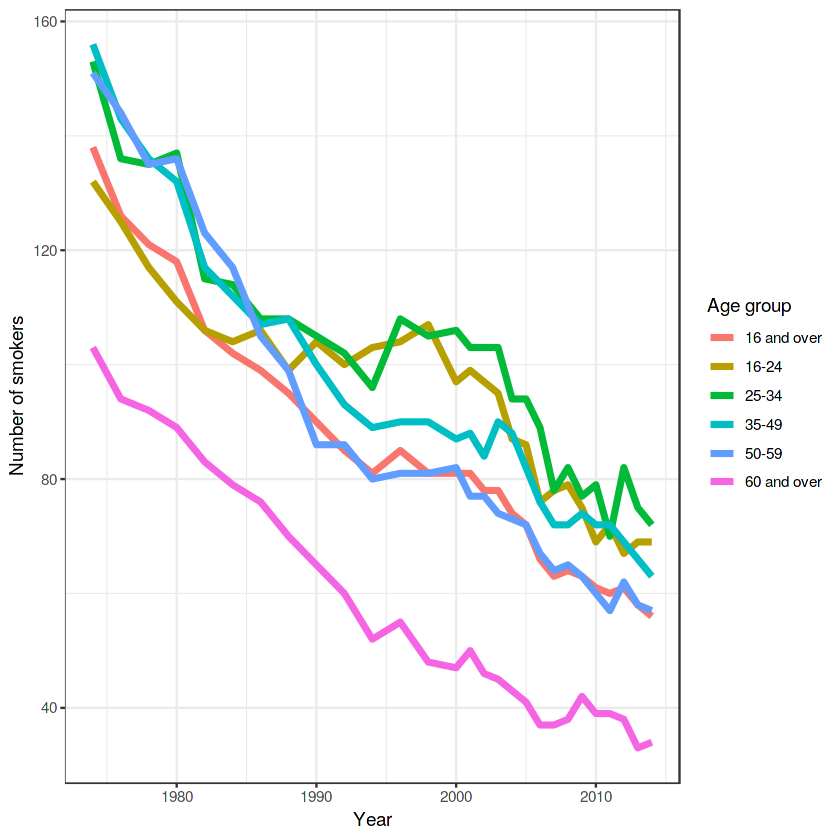

In [11]:
smokers_year_age <- aggregate(
    x = smokers_tall$value,
    by = list(smokers_tall$Year, smokers_tall$variable),
    FUN = sum
)
names(smokers_year_age) <- c("Year", "Age", "N")
ggplot(smokers_year_age, aes(Year, N, color = Age, group = Age))+
    geom_line(size = 1.5)+
    theme_bw()+
    ylab("Number of smokers")+
    scale_color_discrete(
        name = "Age group",
        labels = age_labels
    )

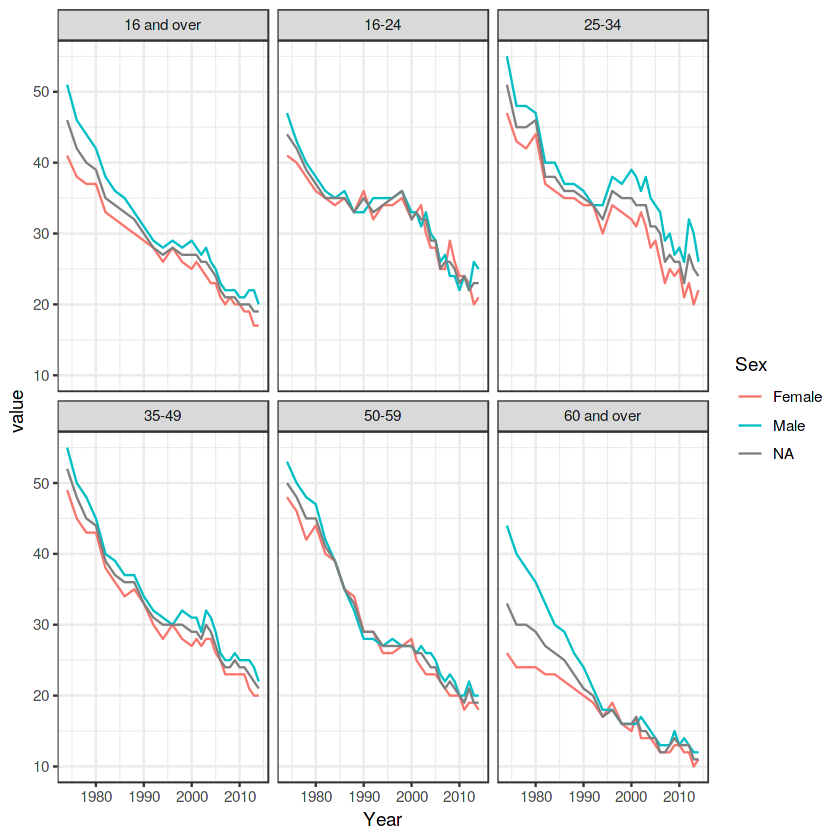

In [12]:
smokers_tall$Sex <- factor(smokers_tall$Sex, levels = c("NA", "Female", "Male"))
levels(smokers_tall$variable) = age_labels
ggplot(smokers_tall, aes(Year, value, color = Sex, group = Sex))+
    geom_line(size = 0.5)+
    facet_wrap(~variable)+
    theme_bw()

In [13]:
prescription_N <- prescriptions[,1:5]
prescription_cost <- prescriptions[, c(1, 6:9)]

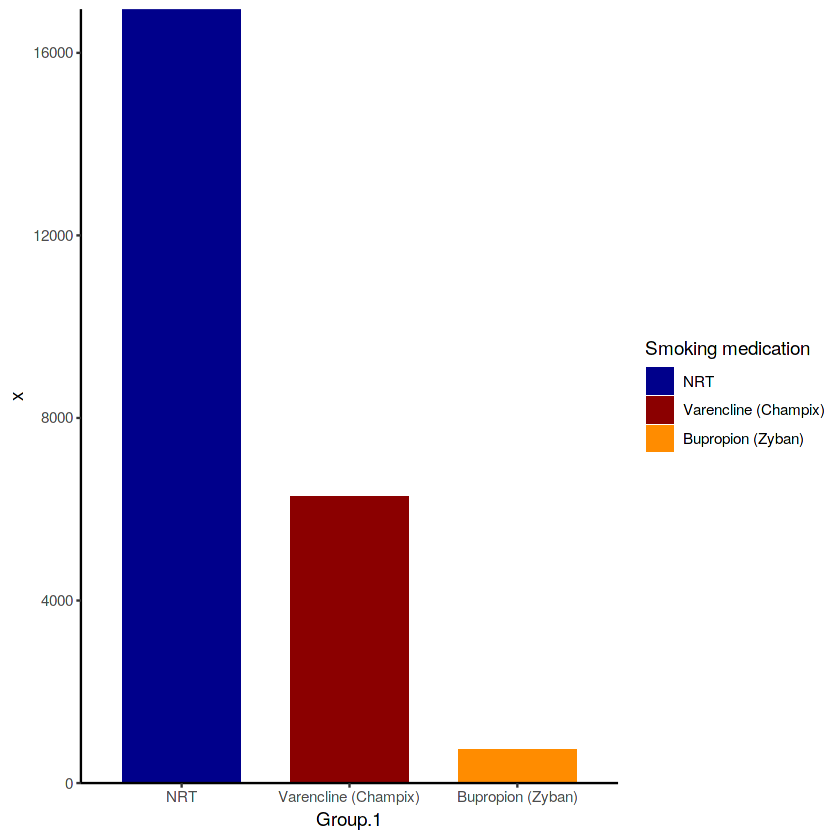

In [14]:
prescription_N[is.na(prescription_N)] = 0
prescription_N_tall <- melt(prescription_N[,-2], id.vars = "Year")
prescription_N_type <- aggregate(
    x = prescription_N_tall$value, 
    by = list(prescription_N_tall$variable),
    FUN = sum
)
prescription_N_type <- prescription_N_type[order(prescription_N_type$x, decreasing = T),]
prescription_N_type$Group.1 <- factor(
    prescription_N_type$Group.1, 
    levels = prescription_N_type$Group.1
)
drug_labels <- c("NRT", "Varencline (Champix)", "Bupropion (Zyban)")
ggplot(prescription_N_type, aes(Group.1, x, fill = Group.1))+
    geom_bar(stat="identity", width = 0.7)+
    scale_fill_manual(
        values = c("darkblue", "darkred", "darkorange"),
        name = "Smoking medication",
        labels = drug_labels
    )+
    theme_classic()+
    scale_x_discrete(labels = drug_labels)+
    scale_y_continuous(expand = c(0,0))